20210130l_m2km.fits

creating gammas
 - 50 polychromatic turbulence layers from 0 to 50 km
 - time: 2.10
calculation initial parametrs
 - threshold: 0.0021; 5 peaks found
 - time: 0.27
approxing
 - initial guess for the parameters:
 Vx, m/s  Vy, m/s          Cn2    z, m
    0.00     0.00 1.509498e-13  2000.0
   -4.98    -2.21 1.378508e-13 10000.0
   -6.08    -5.81 1.497437e-13 10000.0
  -11.06   -10.51 1.496331e-13 10000.0
  -15.76   -15.49 3.539889e-13 10000.0
 - found params:
 Vx, m/s  Vy, m/s          Cn2     z, m
   -0.00     0.01 5.246673e-15  2002.88
   -5.02    -2.43 2.655529e-13  7262.67
  -11.15   -10.47 2.064083e-13  8421.58
   -6.25    -5.98 5.437481e-14  9049.73
  -15.93   -15.56 3.539889e-13 16978.16
 - total Cn2: 8.855715371128562e-13
 - seeing, 650 nm: 1.11
 - time: 10.51


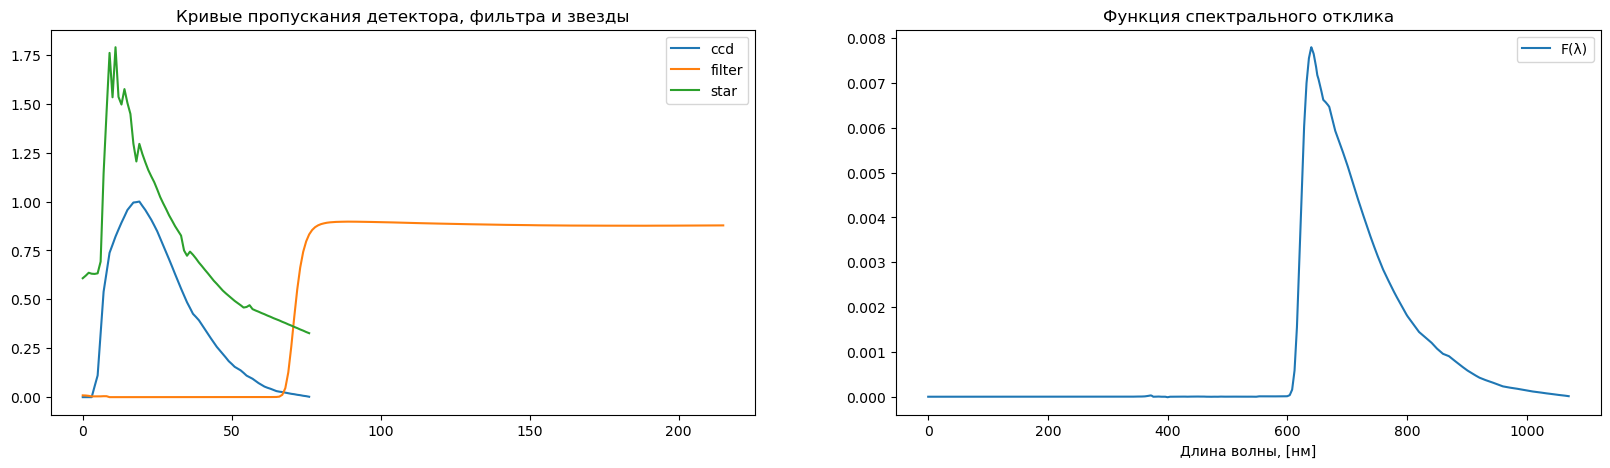

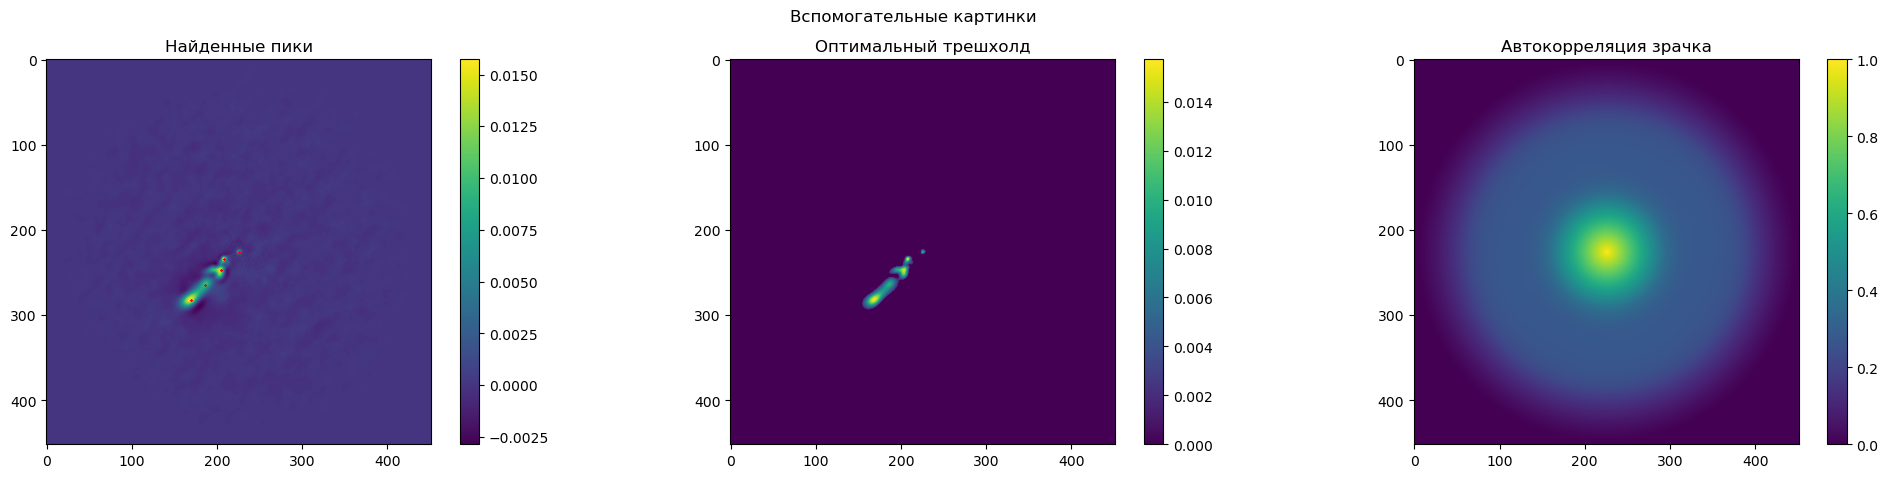

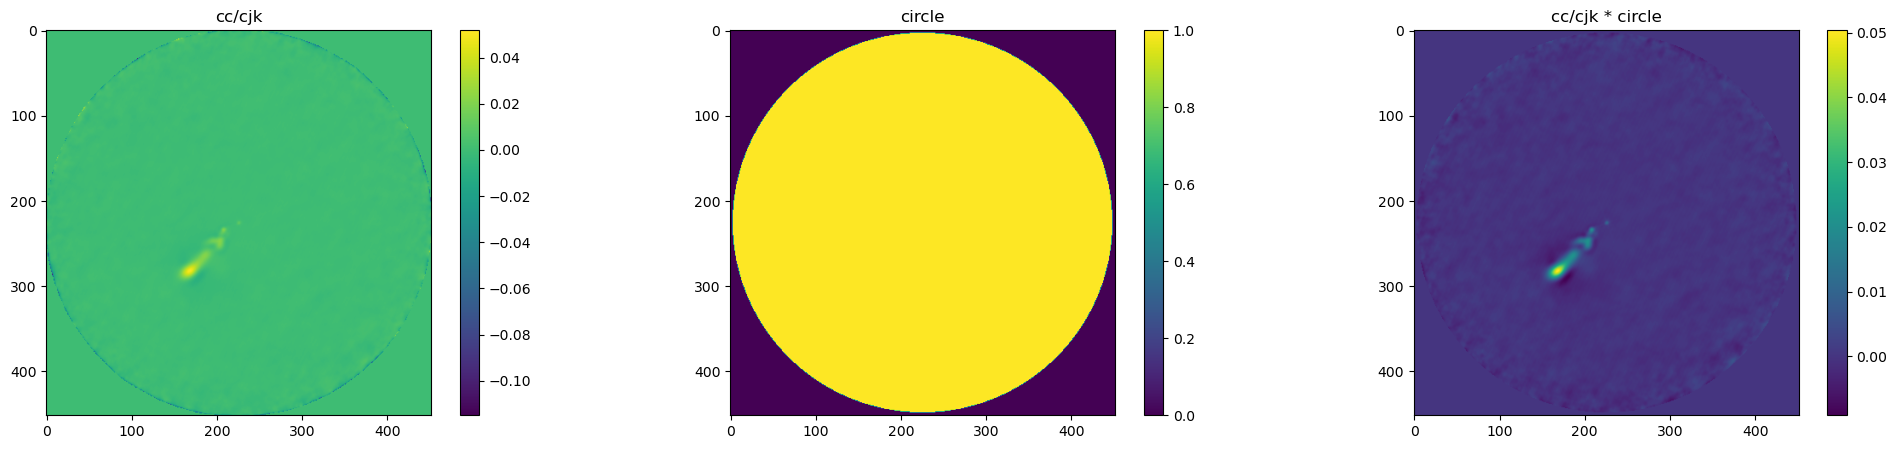

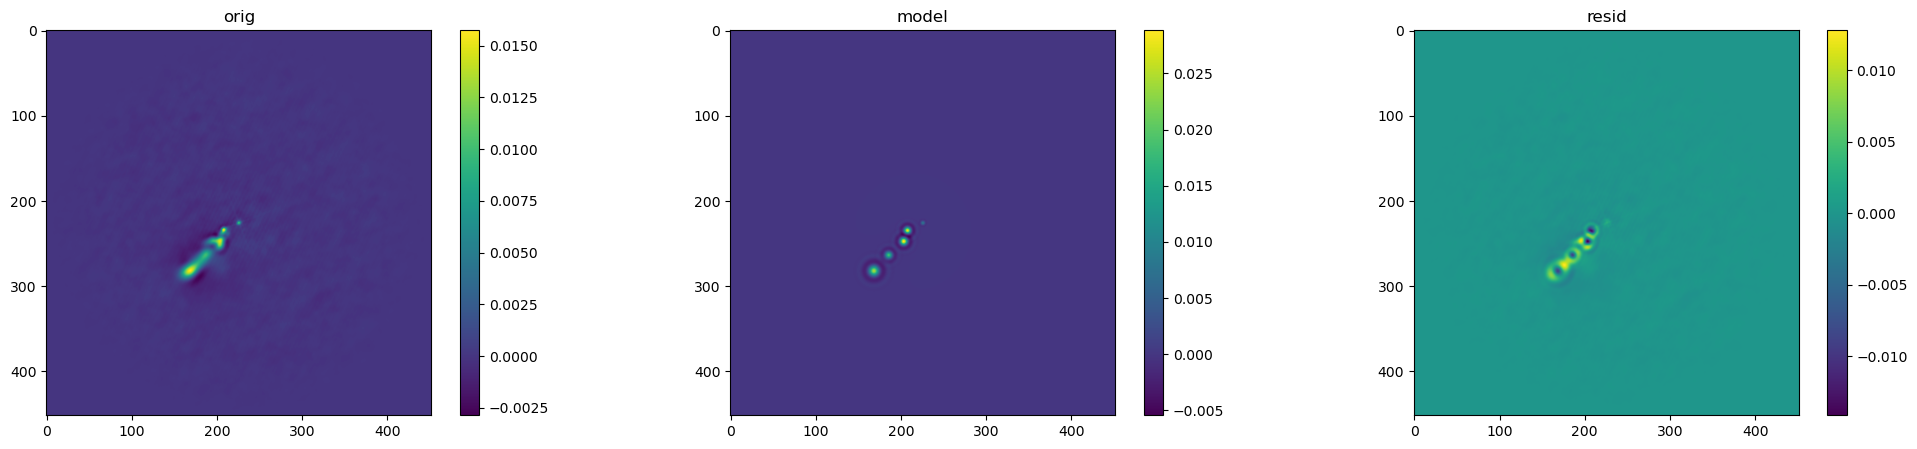

In [2]:
from main import processDomecam

file = '20210130l_m2km.fits'
file_bias = 'bias20210130.fits'
data_dir = 'D:/astro/domecam' # рабочая папка, все исходные файлы должны храниться в ней

'''
удоствовериться, что деление на cjk работает корректно
    - можно будет параметр sigma в curve fit передавать для этой области
        большие значения, чтобы "круг" занулялся

если я делаю cc/cjk то при создании гамм наверное не нужно делать res = res * cjk
'''

latency = [4] # задержка для кросс-корреляции, [кадр]
conjugated_distance = 2 # сопряженное расстояние, [километр]
D = 2.5 # диаметр телескопа, [метр]
spectrum = 'poly' # тип излучения
lambda_ = 650*1e-9 # длина наблюдаемой волны света, [метр]

# для полихроматического излучения нужны кривые фильтра, детектора и звезды
file_filter = 'KC19_d16t4_Safonov.xls'
file_ccd = 'ccd_prosilica2.crv'
file_star = 'a05.sp'

processDomecam(file=file, file_bias=file_bias, data_dir=data_dir, 
               D=D, conjugated_distance=conjugated_distance, latency=latency,
               spectrum=spectrum, lambda_=lambda_, file_filter=file_filter, file_ccd=file_ccd, file_star=file_star)